In [1]:
from IPython.display import Image 

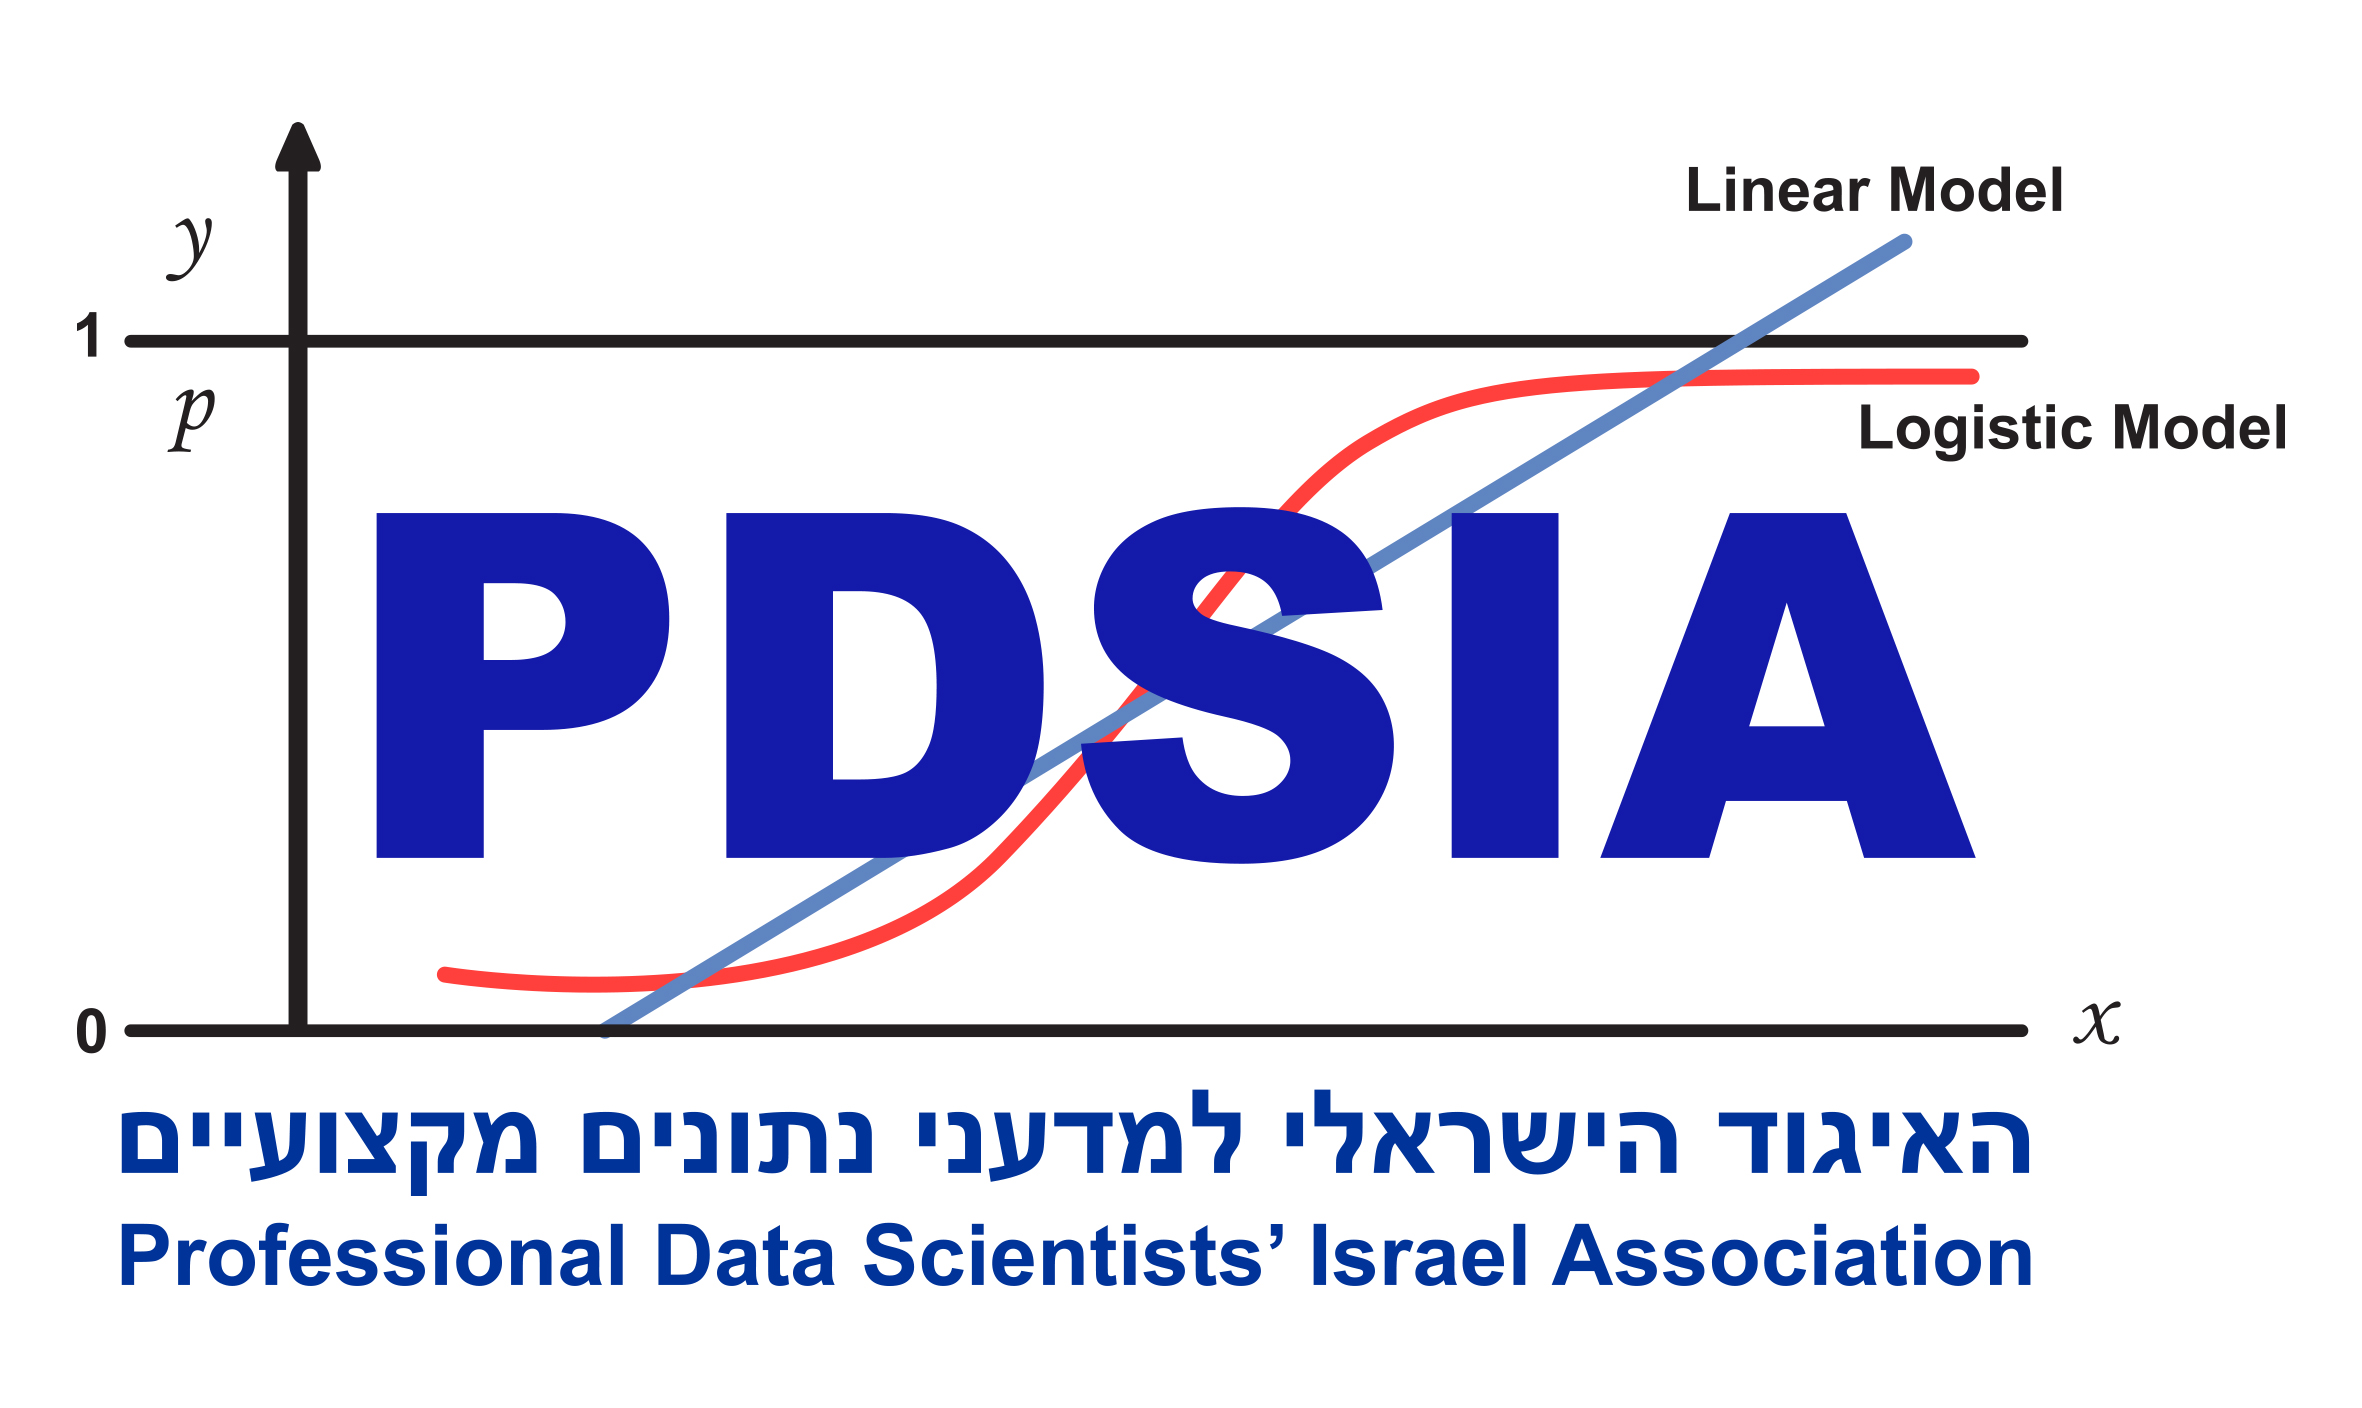

In [2]:
Image(filename='logo.jpg')

# Problem

In order to predict specific company employee churns, I chose the employee churn dataset that was sourced from HR of this company. It has many characteristics of learning.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

#  Loading the data

In [4]:
import pandas as pd
sf = pd.read_csv('Employee_churn_dataset.csv')

In [5]:
sf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [6]:
sf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
sf.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,departments,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [8]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
sf.shape

(14999, 10)

# Basic statistics

In [10]:
sf.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
churn,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% rows show the corresponding percentiles.

# Data Cleaning

In [11]:
print(sf.satisfaction_level.unique())

[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]


In [12]:
print(sf.last_evaluation.unique())

[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]


In [13]:
print(sf.number_project.unique())

[2 5 7 6 4 3]


In [14]:
print(sf.average_montly_hours.unique())

[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145 140 246 126 306 152 269
 127 281 276 182 273 307 309 225 226 308 244 286 161 264 277 275 149 295
 151 249 291 232 130 129 155 265 279 284 221 154 150 267 257 177 144 289
 258 263 251 133 216 300 138 260 183 250 292 283 245 256 278 240 136 301
 243 296 274 164 146 261 285 141 297 156 287 219 254 228 131 252 236 270
 298 192 248 266 238 229 233 268 231 253 302 271 290 235 293 241 218 199
 180 195 237 227 172 206 181 217 310 214 198 211 222 213 202 184 204 288
 220 299 303 212 196 179 205 230 203 280 169 188 178 175 166 163 168 165
 189 162 215 193 176 191 174 201 208 171 111 104 106 100 194 209 185 200
 207 187 210 186 167 108 122 110 115 197 102 109 190  99 101  97 173 121
 170 105 118 119 117 114  96  98 107 123 116 125 113 120 112 124 103]


In [15]:
print(sf.time_spend_company.unique())

[ 3  6  4  5  2  8 10  7]


In [16]:
print(sf.Work_accident.unique())

[0 1]


In [17]:
print(sf.churn.unique())

[1 0]


In [18]:
print(sf.promotion_last_5years.unique())

[0 1]


In [19]:
print(sf.departments.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [20]:
print(sf.salary.unique())

['low' 'medium' 'high']


# Exploratory data analysis

In [21]:
sf.churn.value_counts()

0    11428
1     3571
Name: churn, dtype: int64

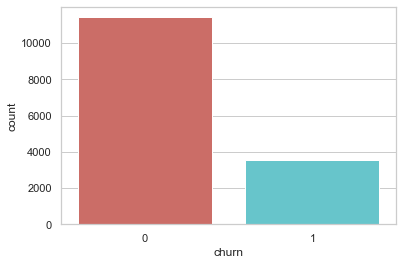

<Figure size 432x288 with 0 Axes>

In [22]:
sns.countplot(x='churn',data=sf, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 11428 no-churns and 3571 churns in the outcome variables.

In [23]:
count_no_churn = len(sf[sf['churn']==0])
count_churn = len(sf[sf['churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

percentage of no churn is 76.19174611640777
percentage of churn 23.80825388359224


Our classes are imbalanced, and the ratio of no-churn to churn instances is 76:23. Before we go ahead to balance the classes, let’s do some more exploration.

Let's get a sense of the numbers across the two classes

In [24]:
sf.groupby('churn').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
churn,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Observations: 

1. The satisfaction_level (which is the employee satisfaction point) of employees who left the company is lower than that of the employees who didn’t - employees who left the company had low satisfaction level.

2. The time_spend_company (which is the number of years spent by an employee in the company) of employees who left the company is higher than that of the employees who didn’t - employees who left the company worked more compare to who stayed in the company.

3. The promotion_last_5years (whether an employee has had a promotion in the last 5 years or not.) of employees who left the company is lower than that of the employees who didn’t - employees who left the company had low promotion rate.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

In [25]:
sf.groupby('Work_accident').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,churn,promotion_last_5years
Work_accident,,,,,,,
0,0.606833,0.716602,3.805456,201.258613,3.496960,0.265160,0.018940
1,0.648326,0.713144,3.788843,199.818349,3.505763,0.077916,0.035039


In [26]:
sf.groupby('promotion_last_5years').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn
promotion_last_5years,,,,,,,
0,0.611895,0.716321,3.804155,201.076431,3.483719,0.142575,0.241962
1,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,0.059561


In [27]:
sf.groupby('departments').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
departments,,,,,,,,
IT,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
support,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973


In [28]:
sf.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


Visualizations

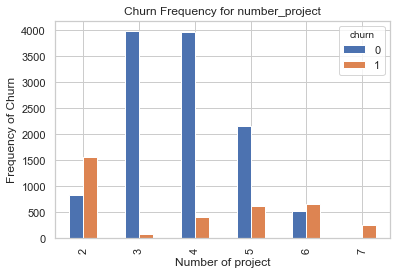

In [29]:
%matplotlib inline
pd.crosstab(sf.number_project,sf.churn).plot(kind='bar')
plt.title('Churn Frequency for number_project')
plt.xlabel('Number of project')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_number_project')

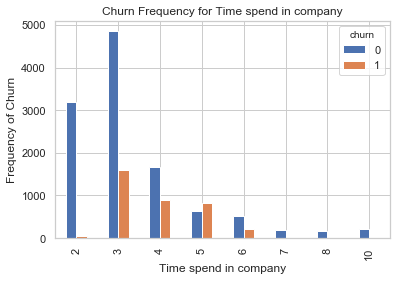

In [30]:
pd.crosstab(sf.time_spend_company,sf.churn).plot(kind='bar')
plt.title('Churn Frequency for Time spend in company')
plt.xlabel('Time spend in company')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_time_spend_company')

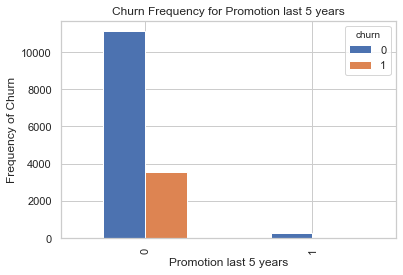

In [31]:
pd.crosstab(sf.promotion_last_5years,sf.churn).plot(kind='bar')
plt.title('Churn Frequency for Promotion last 5 years')
plt.xlabel('Promotion last 5 years')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_promotion_last_5years')

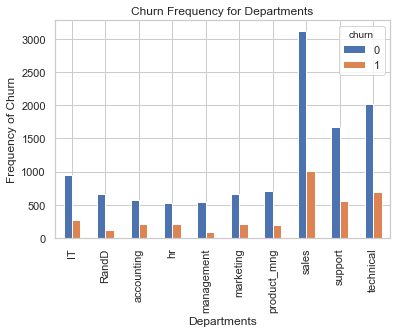

In [32]:
pd.crosstab(sf.departments,sf.churn).plot(kind='bar')
plt.title('Churn Frequency for Departments')
plt.xlabel('Departments')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_departments')

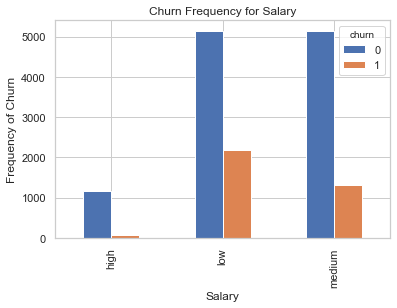

In [33]:
pd.crosstab(sf.salary,sf.churn).plot(kind='bar')
plt.title('Churn Frequency for Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Churn')
plt.savefig('churn_fre_salary')

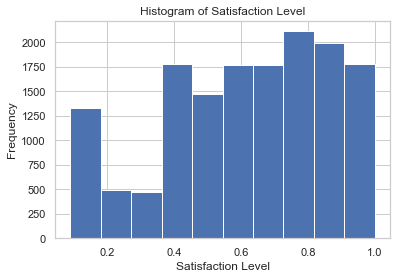

In [34]:
sf.satisfaction_level.hist()
plt.title('Histogram of Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.savefig('hist_satisfaction_level')

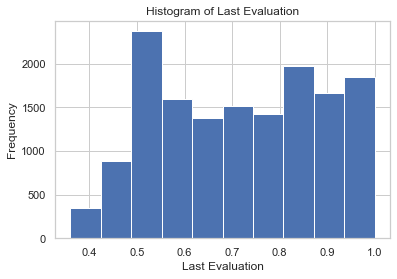

In [35]:
sf.last_evaluation.hist()
plt.title('Histogram of Last Evaluation')
plt.xlabel('Last Evaluation')
plt.ylabel('Frequency')
plt.savefig('hist_last_evaluation')

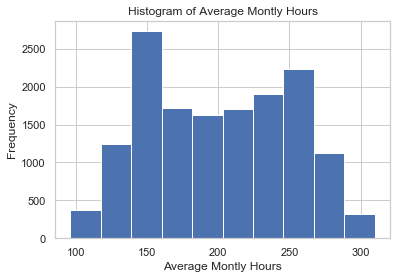

In [36]:
sf.average_montly_hours.hist()
plt.title('Histogram of Average Montly Hours')
plt.xlabel('Average Montly Hours')
plt.ylabel('Frequency')
plt.savefig('hist_average_montly_hours')

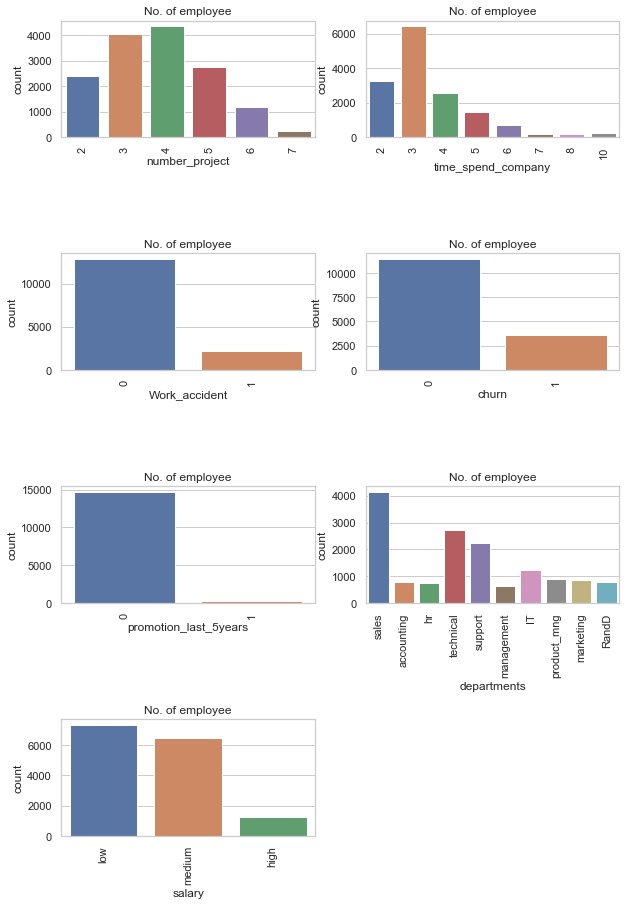

In [37]:
features=['number_project','time_spend_company','Work_accident','churn', 'promotion_last_5years','departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = sf)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

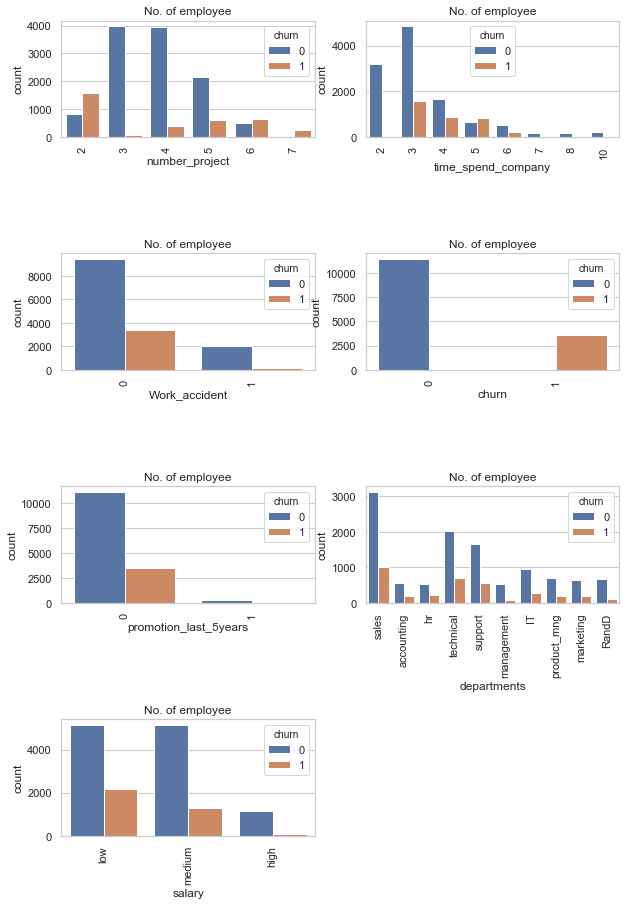

In [38]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = sf, hue='churn')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

# Creating dummy variables

But before we build the model, we need to create dummy variables for these 4 categorical variables: 'Work_accident', 'promotion_last_5years', 'departments', 'salary'.

In [39]:
sf.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'churn',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [40]:
cat_vars=['Work_accident', 'promotion_last_5years', 'departments', 'salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(sf[var], prefix=var)
    sf1=sf.join(cat_list)
    sf=sf1
cat_vars=['Work_accident', 'promotion_last_5years', 'departments', 'salary']
sf_vars=sf.columns.values.tolist()
to_keep=[i for i in sf_vars if i not in cat_vars]

Our final data columns will be:

In [41]:
sf_final=sf[to_keep]
sf_final.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'churn',
       'Work_accident_0', 'Work_accident_1', 'promotion_last_5years_0',
       'promotion_last_5years_1', 'departments_IT', 'departments_RandD',
       'departments_accounting', 'departments_hr',
       'departments_management', 'departments_marketing',
       'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [42]:
sf_final.drop(['Work_accident_0'], axis=1, inplace=True)
sf_final.drop(['promotion_last_5years_0'], axis=1, inplace=True)
sf_final.drop(['salary_low'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Over-sampling using SMOTE

Observations: 


With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

1. Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies..

2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [43]:
X = sf_final.loc[:, sf_final.columns != 'churn']
y = sf_final.loc[:, sf_final.columns == 'churn']
y=y.astype('int') 

In [44]:
X.shape

(14999, 19)

In [45]:
y.shape

(14999, 1)

In [46]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns1= X_train.columns

In [47]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)

In [48]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['churn'])

In [49]:
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['churn']==1])/len(os_data_X))

length of oversampled data is  15932
Number of no churn in oversampled data 7966
Number of churn 7966
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [50]:
sf_final_vars=sf_final.columns.values.tolist()
y=['churn']
X=[i for i in sf_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [51]:
sf_X2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rfe.ranking_},)
sf_X2.sort_values(by=['Importance'])

,Feature,Importance
0,satisfaction_level,1
16,departments_technical,1
15,departments_support,1
14,departments_sales,1
13,departments_product_mng,1
12,departments_marketing,1
11,departments_management,1
10,departments_hr,1
17,salary_high,1
9,departments_accounting,1


In [52]:
cols=[]
for i in range (0, len(sf_X2["Importance"])):
    if sf_X2["Importance"][i] == 1:
        cols.append(sf_X2["Feature"][i])
print(cols)
print(len(cols))

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident_1', 'promotion_last_5years_1', 'departments_IT', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_support', 'departments_technical', 'salary_high', 'salary_medium']
19


The RFE has helped us select the following features: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident_1', 'promotion_last_5years_1', 'departments_IT', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_support', 'departments_technical', 'salary_high', 'salary_medium']

In [53]:
X=os_data_X[cols]
y=os_data_y['churn']

# Implementing the model

In [54]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.476061
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.313     
Dependent Variable:    churn              AIC:                15207.2171
Date:                  2020-05-09 01:13   BIC:                15353.0628
No. Observations:      15932              Log-Likelihood:     -7584.6   
Df Model:              18                 LL-Null:            -11043.   
Df Residuals:          15913              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
satisfaction_level      -4.1984   0.0973 -43.1492 0

In [55]:
pvalue = pd.DataFrame(result.pvalues,columns={'p_value'},)
pvalue

,p_value
satisfaction_level,0.000000e+00
last_evaluation,1.509148e-51
number_project,3.621408e-127
average_montly_hours,6.372965e-76
time_spend_company,7.734491e-238
Work_accident_1,1.667033e-116
promotion_last_5years_1,1.287472e-15
departments_IT,4.319643e-48
departments_RandD,3.472302e-56
departments_accounting,7.123790e-29


In [56]:
pvs=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs.append(pvalue.index[i])
print(pvs)
print(len(pvs)) 

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident_1', 'promotion_last_5years_1', 'departments_IT', 'departments_RandD', 'departments_accounting', 'departments_hr', 'departments_management', 'departments_marketing', 'departments_product_mng', 'departments_sales', 'departments_support', 'departments_technical', 'salary_high', 'salary_medium']
19


In [57]:
X=os_data_X[pvs]
y=os_data_y['churn']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.476061
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.313     
Dependent Variable:    churn              AIC:                15207.2171
Date:                  2020-05-09 01:13   BIC:                15353.0628
No. Observations:      15932              Log-Likelihood:     -7584.6   
Df Model:              18                 LL-Null:            -11043.   
Df Residuals:          15913              LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
satisfaction_level      -4.1984   0.0973 -43.1492 0

In [58]:
X=os_data_X[pvs]
y=os_data_y['churn']

#  Co-relation between variables

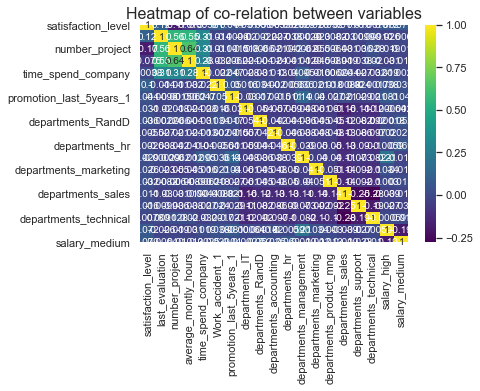

In [59]:
#Use heatmap to see corelation between variables
sns.heatmap(X.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

# Baseline Logistic Regression

In [60]:
# Normalize Feature variable
# initiatilise
ss=StandardScaler()
#apply stardardisation
X_std=ss.fit_transform(X) 

In [61]:
#split the data into train and test with test size and 30% and train size as 70%
X_train, X_test, y_train, y_test=train_test_split(X_std,y,test_size=0.3, random_state=42)
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (11152, 19)
Test data size: (4780, 19)


# Train the model

In [62]:
logreg=LogisticRegression()
#fit the ogistic model on train data
logreg_model=logreg.fit(X_train,y_train) 

Done! We now have a working Logistic Regression model.

# Prediction

In [64]:
#predict using the model
y_pred_logreg=logreg_model.predict(X_test)
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2412
           1       0.80      0.83      0.81      2368

    accuracy                           0.81      4780
   macro avg       0.81      0.81      0.81      4780
weighted avg       0.81      0.81      0.81      4780



In [65]:
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of baseline logistic regession model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_logreg)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_logreg)))
#calculate Precision
print("Precision of baseline logistic regession model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_logreg)))
print("\nPrecision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted an employee is going to leave the company, that employee actually left", "{:.2%}".format(metrics.precision_score(y_test, y_pred_logreg)) ,"of the time.")
#calculate Recall
print("Recall of baseline logistic regession model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_logreg)))
print("\nRecall: If there is an employee who left present in the test set and our Logistic Regression model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred_logreg)) ,"of the time.")

Accuracy of baseline logistic regession model: 80.88%

Well, you got a classification rate of 80.88%
Precision of baseline logistic regession model: 79.58%

Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted an employee is going to leave the company, that employee actually left 79.58% of the time.
Recall of baseline logistic regession model: 82.60%

Recall: If there is an employee who left present in the test set and our Logistic Regression model can identify it 82.60% of the time.


## Confusion Matrix

In [66]:
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print(confusion_matrix_logreg)

[[1910  502]
 [ 412 1956]]


In [67]:
print("The result is telling us that we have: ",(confusion_matrix_logreg[0,0]+confusion_matrix_logreg[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix_logreg[0,1]+confusion_matrix_logreg[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix_logreg.sum()))

The result is telling us that we have:  3866 correct predictions.
The result is telling us that we have:  914 incorrect predictions.
We have a total predictions of:  4780


## ROC Curve

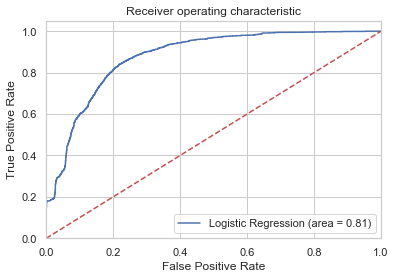

In [68]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree Classification

Let us try to apply Decision Tree Classification technique and see if any improvement happens

## Train the model

In [69]:
dt_one_reg=DecisionTreeClassifier()
#fit the ecision Tree Classification on train data
dt_model=dt_one_reg.fit(X_train,y_train)

## Prediction

In [70]:
#predict using the model
y_pred_dtone=dt_one_reg.predict(X_test)
print(classification_report(y_test, y_pred_dtone))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2412
           1       0.95      0.97      0.96      2368

    accuracy                           0.96      4780
   macro avg       0.96      0.96      0.96      4780
weighted avg       0.96      0.96      0.96      4780



In [71]:
#predict using the model
y_pred_dtone=dt_one_reg.predict(X_test)
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Decision Tree Classification model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_dtone)))
#calculate Precision
print("Precision of Decision Tree Classification model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_dtone)))
#calculate Recall
print("Recall of Decision Tree Classification model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_dtone)))

Accuracy of Decision Tree Classification model: 96.23%
Precision of Decision Tree Classification model: 95.28%
Recall of Decision Tree Classification model: 97.21%


## Confusion Matrix

In [72]:
confusion_matrix_dtone = confusion_matrix(y_test, y_pred_dtone)
print(confusion_matrix_dtone)

[[2298  114]
 [  66 2302]]


In [73]:
print("The result is telling us that we have: ",(confusion_matrix_dtone[0,0]+confusion_matrix_dtone[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix_dtone[0,1]+confusion_matrix_dtone[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix_dtone.sum()))

The result is telling us that we have:  4600 correct predictions.
The result is telling us that we have:  180 incorrect predictions.
We have a total predictions of:  4780


## ROC Curve

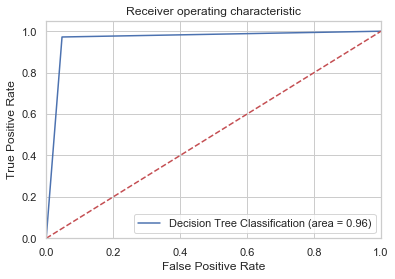

In [74]:
dt_one_reg_roc_auc = roc_auc_score(y_test, dt_one_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_one_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classification (area = %0.2f)' % dt_one_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

# Random Forest Classification

Let us apply Random Forest Classification and measure Precision

## Train the model

In [75]:
rf_reg=RandomForestClassifier()
#fit the Random Forest Classification on train data
rf_model=rf_reg.fit(X_train,y_train)

## Prediction

In [76]:
#predict using the model
y_pred_rf=rf_reg.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2412
           1       0.99      0.97      0.98      2368

    accuracy                           0.98      4780
   macro avg       0.98      0.98      0.98      4780
weighted avg       0.98      0.98      0.98      4780



In [77]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest Classification model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_rf)))
#calculate Precision
print("Precision of Random Forest Classification model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_rf)))
#calculate Recall
print("Recall of Random Forest Classification model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_rf)))

Accuracy of Random Forest Classification model: 98.08%
Precision of Random Forest Classification model: 99.39%
Recall of Random Forest Classification model: 96.71%


## Confusion Matrix

In [78]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix_rf)

[[2398   14]
 [  78 2290]]


In [79]:
print("The result is telling us that we have: ",(confusion_matrix_rf[0,0]+confusion_matrix_rf[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix_rf[0,1]+confusion_matrix_rf[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix_rf.sum()))

The result is telling us that we have:  4688 correct predictions.
The result is telling us that we have:  92 incorrect predictions.
We have a total predictions of:  4780


## ROC Curve

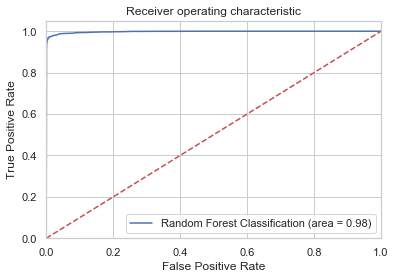

In [80]:
rf_reg_roc_auc = roc_auc_score(y_test, rf_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification (area = %0.2f)' % rf_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

# Gradient Boosting Classification

Let us apply Gradient Boosting Classification and measure Precision

## Train the model

In [81]:
gb_reg = GradientBoostingClassifier()
#fit the Gradient Boosting Classification on train data
gb_model=gb_reg.fit(X_train,y_train)

# Prediction

In [82]:
#predict using the model
y_pred_gb=gb_reg.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2412
           1       0.98      0.95      0.96      2368

    accuracy                           0.96      4780
   macro avg       0.96      0.96      0.96      4780
weighted avg       0.96      0.96      0.96      4780



In [83]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting Classification model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_gb)))
#calculate Precision
print("Precision of Gradient Boosting Classification model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_gb)))
#calculate Recall
print("Recall of Gradient Boosting Classification model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_gb)))

Accuracy of Gradient Boosting Classification model: 96.15%
Precision of Gradient Boosting Classification model: 97.52%
Recall of Gradient Boosting Classification model: 94.64%


## Confusion Matrix

In [84]:
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(confusion_matrix_gb)

[[2355   57]
 [ 127 2241]]


In [85]:
print("The result is telling us that we have: ",(confusion_matrix_gb[0,0]+confusion_matrix_gb[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix_gb[0,1]+confusion_matrix_gb[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix_gb.sum()))

The result is telling us that we have:  4596 correct predictions.
The result is telling us that we have:  184 incorrect predictions.
We have a total predictions of:  4780


## ROC Curve

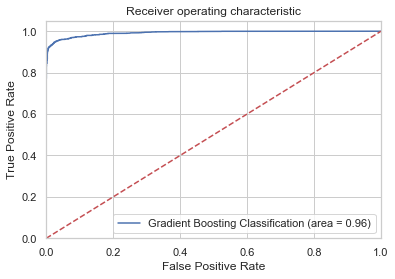

In [86]:
gb_reg_roc_auc = roc_auc_score(y_test, gb_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classification (area = %0.2f)' % gb_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GB_ROC')
plt.show()

# Support Vector Machine Classification

Let us apply Support Vector Machine Classification and measure Precision

## Train the model

In [87]:
sv_reg=SVC()
#fit the Support Vector Machine Classification on train data
sv_model=sv_reg.fit(X_train,y_train)

## Prediction

In [88]:
#predict using the model
y_pred_sv=sv_reg.predict(X_test)
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2412
           1       0.96      0.95      0.96      2368

    accuracy                           0.96      4780
   macro avg       0.96      0.96      0.96      4780
weighted avg       0.96      0.96      0.96      4780



In [89]:
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of Support Vector Machine Classification model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred_sv)))
#calculate Precision
print("Precision of Support Vector Machine Classification model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred_sv)))
#calculate Recall
print("Recall of Support Vector Machine Classification model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred_sv)))

Accuracy of Support Vector Machine Classification model: 95.63%
Precision of Support Vector Machine Classification model: 95.80%
Recall of Support Vector Machine Classification model: 95.35%


## Confusion Matrix

In [90]:
confusion_matrix_sv = confusion_matrix(y_test, y_pred_sv)
print(confusion_matrix_sv)

[[2313   99]
 [ 110 2258]]


In [91]:
print("The result is telling us that we have: ",(confusion_matrix_sv[0,0]+confusion_matrix_sv[1,1]),"correct predictions.")
print("The result is telling us that we have: ",(confusion_matrix_sv[0,1]+confusion_matrix_sv[1,0]),"incorrect predictions.")
print("We have a total predictions of: ",(confusion_matrix_sv.sum()))

The result is telling us that we have:  4571 correct predictions.
The result is telling us that we have:  209 incorrect predictions.
We have a total predictions of:  4780


# Final Conclusion

In [92]:
print('Precision of Logistic Regression model:',"{:.2%}".format(metrics.precision_score(y_test, y_pred_logreg)))
print('Precision of Decision Tree Classification model:',"{:.2%}".format(metrics.precision_score(y_test, y_pred_dtone)))
print('Precision of Random Forest Classification model:',"{:.2%}".format(metrics.precision_score(y_test, y_pred_rf)))
print('Precision of Gradient Boosting Classification model:',"{:.2%}".format(metrics.precision_score(y_test, y_pred_gb)))
print('Precision of Support Vector Machine Classification model:',"{:.2%}".format(metrics.precision_score(y_test, y_pred_sv)))

Precision of Logistic Regression model: 79.58%
Precision of Decision Tree Classification model: 95.28%
Precision of Random Forest Classification model: 99.39%
Precision of Gradient Boosting Classification model: 97.52%
Precision of Support Vector Machine Classification model: 95.80%


__Hence Random Forest Classification model is selected for the prediction of employee churn using the features__

# Real Time Prediction

In [93]:
chosenModel = X.columns
chosenModel

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident_1',
       'promotion_last_5years_1', 'departments_IT', 'departments_RandD',
       'departments_accounting', 'departments_hr', 'departments_management',
       'departments_marketing', 'departments_product_mng', 'departments_sales',
       'departments_support', 'departments_technical', 'salary_high',
       'salary_medium'],
      dtype='object')

In [94]:
len(chosenModel)

19

In [96]:
a = float(input("Please enter the employee satisfaction level (ranges from 0-1):"))
b = float(input("Please enter the employee performance evaluation level by the employer (ranges from 0-1):"))
c = int(input("Please enter the number of projects assigned to the employee:"))
d = int(input("Please enter the average numbers of hours worked by the employee in a month:"))
e = int(input("Please enter the number of years spent by the employee in the company:"))
f = int(input("Has the employee had a work accident (1 if yes, 0 otherwise):"))
g = int(input("Has the employee had a promotion in the last 5 years (1 if yes, 0 otherwise):"))
h = int(input("Does the employee work at the IT department (1 if yes, 0 otherwise):"))
i = int(input("Does the employee work at the R&D department (1 if yes, 0 otherwise):"))
j = int(input("Does the employee work at the Accounting department (1 if yes, 0 otherwise):"))
k = int(input("Does the employee work at the HR department (1 if yes, 0 otherwise):"))
l = int(input("Does the employee work at the Management department (1 if yes, 0 otherwise):"))
m = int(input("Does the employee work at the Marketing department (1 if yes, 0 otherwise):"))
n = int(input("Does the employee work at the Product management department (1 if yes, 0 otherwise):"))
o = int(input("Does the employee work at the Sales department (1 if yes, 0 otherwise):"))
p = int(input("Does the employee work at the Support department (1 if yes, 0 otherwise):"))
q = int(input("Does the employee work at the Technical department (1 if yes, 0 otherwise):"))
r = int(input("Is the employee salary level high (1 if yes, 0 otherwise):"))
s = int(input("Is the employee salary level medium (1 if yes, 0 otherwise):"))
new_data = np.array([a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s]).reshape(1,-1)
new_pred=rf_reg.predict(new_data)
int(new_pred[0])
if int(new_pred[0]) == 1:
    print("\033[1m The employee is predicted to churn (to leave the company)\033[1m")
else:
    print("\033[1m The employee is predicted not to churn (to stay in the company)\033[1m")

Please enter the employee satisfaction level (ranges from 0-1):0.38
Please enter the employee performance evaluation level by the employer (ranges from 0-1):0.53
Please enter the number of projects assigned to the employee:2
Please enter the average numbers of hours worked by the employee in a month:157
Please enter the number of years spent by the employee in the company:3
Has the employee had a work accident (1 if yes, 0 otherwise):0
Has the employee had a promotion in the last 5 years (1 if yes, 0 otherwise):0
Does the employee work at the IT department (1 if yes, 0 otherwise):0
Does the employee work at the R&D department (1 if yes, 0 otherwise):0
Does the employee work at the Accounting department (1 if yes, 0 otherwise):0
Does the employee work at the HR department (1 if yes, 0 otherwise):0
Does the employee work at the Management department (1 if yes, 0 otherwise):0
Does the employee work at the Marketing department (1 if yes, 0 otherwise):0
Does the employee work at the Product